In [1]:
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline
import numpy as np

import cv2

from skimage.io import imread
from skimage import color 

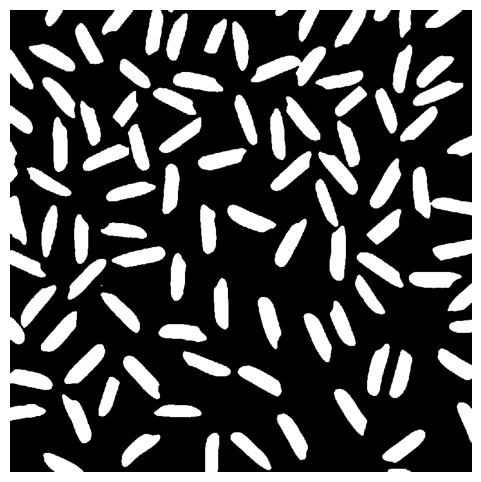

In [2]:
# we start from an already segmented image
img = imread('rice_binarized.png')

plt.figure(figsize=(6,6))
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [3]:
# calculation of the contours in the images
contours,hierarchy =cv2.findContours(img,                 # if image is boolean you need to convert with np.uint8(img)
                                     cv2.RETR_LIST,       # retrieves all contours without establishing any hierarchy
                                     cv2.CHAIN_APPROX_NONE# lists all contour points, not endpoints of line segments
                                    )

In [4]:
# pixels belonging to the first contour 
print(contours[1])

[[[ 64 815]]

 [[ 63 816]]

 [[ 62 816]]

 [[ 62 817]]

 [[ 61 818]]

 [[ 61 819]]

 [[ 61 820]]

 [[ 62 821]]

 [[ 62 822]]

 [[ 62 823]]

 [[ 63 824]]

 [[ 63 825]]

 [[ 63 826]]

 [[ 63 827]]

 [[ 63 828]]

 [[ 63 829]]

 [[ 64 830]]

 [[ 64 831]]

 [[ 65 832]]

 [[ 66 833]]

 [[ 67 834]]

 [[ 67 835]]

 [[ 68 836]]

 [[ 69 837]]

 [[ 70 838]]

 [[ 70 839]]

 [[ 71 840]]

 [[ 72 840]]

 [[ 73 841]]

 [[ 73 842]]

 [[ 74 843]]

 [[ 75 843]]

 [[ 76 844]]

 [[ 77 845]]

 [[ 78 846]]

 [[ 79 846]]

 [[ 80 847]]

 [[ 81 848]]

 [[ 82 849]]

 [[ 83 849]]

 [[ 84 849]]

 [[ 85 849]]

 [[ 86 849]]

 [[ 87 849]]

 [[ 88 849]]

 [[ 89 849]]

 [[ 90 849]]

 [[ 91 849]]

 [[ 92 849]]

 [[ 93 849]]

 [[ 94 849]]

 [[ 95 849]]

 [[ 96 849]]

 [[ 97 849]]

 [[ 98 849]]

 [[ 99 849]]

 [[100 849]]

 [[101 849]]

 [[102 849]]

 [[103 849]]

 [[104 849]]

 [[105 849]]

 [[106 849]]

 [[107 849]]

 [[108 849]]

 [[109 849]]

 [[110 849]]

 [[111 849]]

 [[112 849]]

 [[113 849]]

 [[114 849]]

 [[115

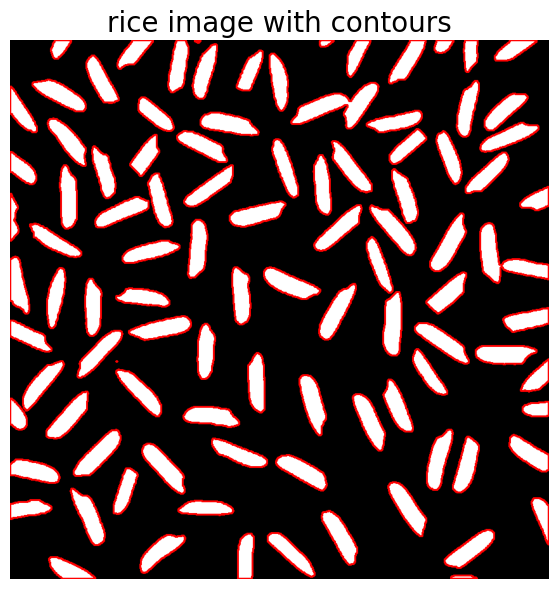

In [5]:
# draw contours into color image
dst = color.gray2rgb(img)
image_plus = cv2.drawContours(dst, contours, 
                              -1,                # index of contour to draw, -1 means all
                              (255,0,0),         # color of contour
                              2                  # thickness of line, 2 for better visualization
                             )

plt.figure(figsize=(7,7))
plt.imshow(image_plus, cmap=plt.cm.gray)
plt.axis('off')
plt.title('rice image with contours', fontsize=20)
plt.show()

In [6]:
# compute surrounded area and length of the contours
for i in range(len(contours)):
        print('Contour {}: Area = {:.2f}, Length = {:.2f}'.format(
               i,  cv2.contourArea(contours[i]), cv2.arcLength(contours[i], True))) # True indicates closed contour

Contour 0: Area = 176.50, Length = 87.90
Contour 1: Area = 1404.50, Length = 182.95
Contour 2: Area = 1893.50, Length = 210.35
Contour 3: Area = 1556.50, Length = 180.87
Contour 4: Area = 1885.50, Length = 219.81
Contour 5: Area = 2117.00, Length = 217.42
Contour 6: Area = 2197.50, Length = 228.69
Contour 7: Area = 1515.50, Length = 196.81
Contour 8: Area = 1333.50, Length = 170.67
Contour 9: Area = 1072.50, Length = 175.98
Contour 10: Area = 2195.50, Length = 236.21
Contour 11: Area = 2242.50, Length = 229.66
Contour 12: Area = 1473.50, Length = 185.44
Contour 13: Area = 1957.50, Length = 203.30
Contour 14: Area = 2148.00, Length = 219.28
Contour 15: Area = 2308.50, Length = 232.15
Contour 16: Area = 1894.00, Length = 221.82
Contour 17: Area = 2058.00, Length = 219.34
Contour 18: Area = 1875.00, Length = 195.48
Contour 19: Area = 2203.00, Length = 234.51
Contour 20: Area = 2354.50, Length = 232.49
Contour 21: Area = 2004.00, Length = 210.71
Contour 22: Area = 796.00, Length = 117.46
C

In [7]:
# compute the average length of the contours
avg =0
for i in range(len(contours)): 
    length =  cv2.arcLength(contours[i], True)
    avg += length
    
avg = avg / len(contours)

print('{:.2f}'.format(avg))

201.90


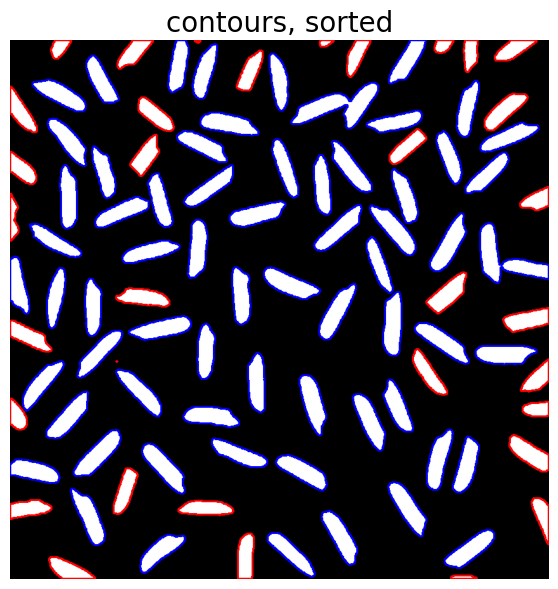

In [8]:
# draw contours in two colors depending if they are longer or shorter than the average
img_f = color.gray2rgb(img)
#loop through all contours
for i in range(len(contours)):
    
    if  cv2.arcLength(contours[i], True) < avg:
        red =255
        blue = 0
    else:
        blue =255
        red = 0
        
    img_f=cv2.drawContours(img_f,[contours[i]],0,(red,0,blue),2)
    
plt.figure(figsize=(7,7))
plt.imshow(img_f)
plt.axis('off')
plt.title('contours, sorted', fontsize=20)
plt.show()    